In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
from sgtaxidata import *
from sklearn.linear_model import *



In [2]:
DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952


In [3]:
df=taxis.getdf_loc_dates(DBNAME,['20170624','20170625','20170626','20170627','20170628'],LAT,LON)
df.head()

,Point,Time,X,Y,TaxiCount
0,0,0900,24,12,28
1,1,0905,24,12,37
2,2,0910,24,12,34
3,3,0915,24,12,35
4,4,0920,24,12,37


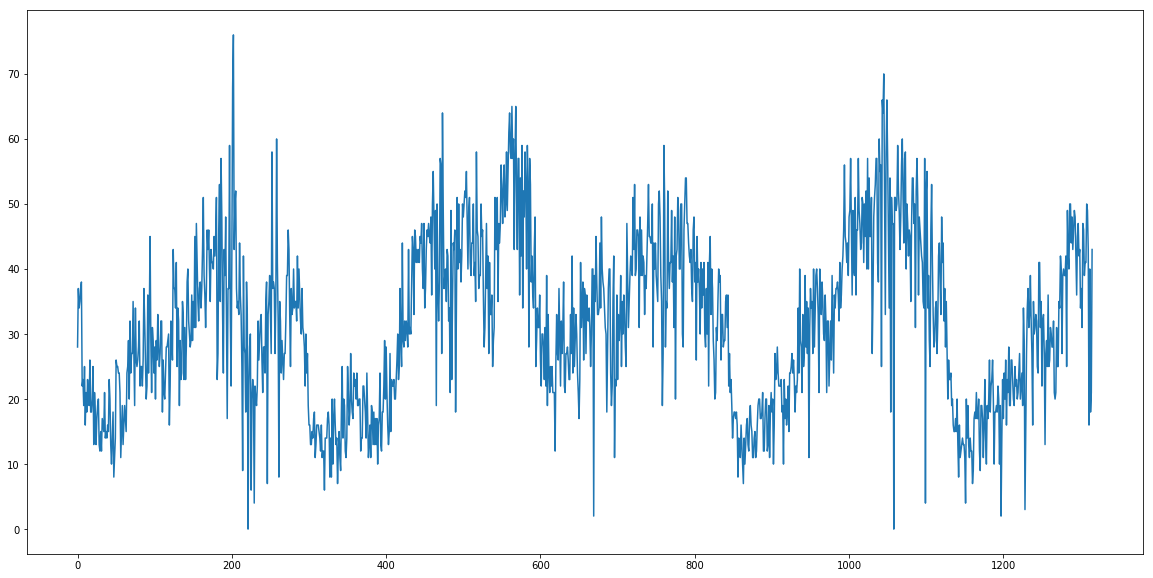

In [4]:
visualize.plot_data([(df['Point'].tolist(),df['TaxiCount'].tolist())])

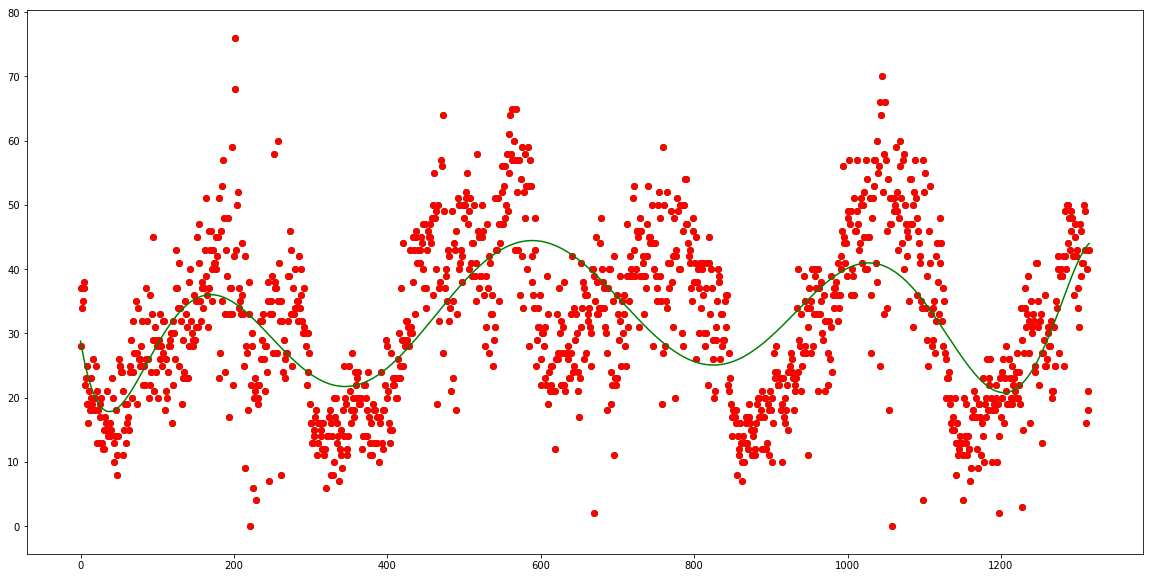

[38, 39, 39, 39]
      Point  Time   X   Y  TaxiCount
1311   1311  2335  24  12         16
1312   1312  2340  24  12         40
1313   1313  2345  24  12         18
1314   1314  2350  24  12         21
1315   1315  2355  24  12         43


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=10,include_bias=True)),
                  ('ridge', Ridge(alpha=0.1,fit_intercept=True))])

X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

visualize.plot_model(X,y,model)

X_predict=np.array([1292,1293,1294,1295]).reshape(-1,1)


print [int(x) for x in model.predict(X_predict)]

print df.tail()